<p style="text-align: center; font: 40px Arial; font-weight:600 ; text-decoration:underline">Projekt - Analiza i Wizualizacja Danych</p>
<p style="text-align: center; font: 30px Arial; font-weight:400 ">Analiza danych rzeczywistych</p>



<h3> Antoni Perużyński, Karolina Tatarczyk </h3>

 <p style="background-color: pink; font: 30px Arial; font-weight:600 ; text-decoration:underline">Obróbka danych</p>

<p style=" font: 25px Arial; font-weight:600 ">Importowanie bibliotek</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math

<p style=" font: 25px Arial; font-weight:600 ">Definicja parametrów</p>

In [2]:
KolorKobiet = "magenta"
KolorMen = "blue"
KolorRazem = "black"

<p style=" font: 25px Arial; font-weight:600 ">Wczytanie arkusza danych</p>

In [3]:
r19 = pd.read_excel('tablice_trwania_zycia_1990-2019.xls', sheet_name='2019',names=['Plec', 'Wiek', 'Liczba','P','Zmarli','Ludnosc','Skumulowana','Dalsze'])
r2019 = r19.drop([0,1,2], axis=0)

<p style="font: 25px Arial; font-weight:600 ">Zamiana danych w ramkę danych</p>

In [4]:
_dane = []
for i in r2019.values:
    temp = []
    for j in i:
        temp.append(j)
    _dane.append(temp)
    
Rok2019 = pd.DataFrame(_dane, dtype="float64", columns=r2019.columns)
Rok2019

,Plec,Wiek,Liczba,P,Zmarli,Ludnosc,Skumulowana,Dalsze
0,1.0,0.0,100000.0,0.00391,391.0,99805.0,7406611.0,74.07
1,1.0,1.0,99609.0,0.00027,28.0,99595.0,7306807.0,73.35
2,1.0,2.0,99581.0,0.00018,18.0,99572.0,7207212.0,72.38
3,1.0,3.0,99563.0,0.00012,12.0,99557.0,7107640.0,71.39
4,1.0,4.0,99551.0,0.00010,10.0,99546.0,7008083.0,70.40
...,...,...,...,...,...,...,...,...
197,2.0,96.0,8554.0,0.23979,2051.0,7529.0,25704.0,3.00
198,2.0,97.0,6503.0,0.25988,1690.0,5658.0,18176.0,2.79
199,2.0,98.0,4813.0,0.28088,1352.0,4137.0,12518.0,2.60
200,2.0,99.0,3461.0,0.30276,1048.0,2937.0,8381.0,2.42


<p style="font: 25px Arial; font-weight:600 ">Objaśnienia kolumn</p>

+ Plec - Płeć 1-mężczyzna 2-kobieta 
+ Wiek - Wiek 
+ Liczba - Liczba osób dożywających wieku x ukończonych lat
+ P - Prawdopodobieństwo zgonu w ciągu roku osoby w wieku x ukończonych lat
+ Zmarli - liczba osób zmarłych w ciągu roku w wieku x ukończonych lat
+ Ludnosc - średnia liczba osób dożywających wieku x ukończonych lat
+ Skumulowana - łączna liczba lat, jaką mają do przeżycia – do końca trwania tej generacji – osoby w wieku x ukończonych lat
+ Dalsze - przeciętne dalsze trwanie życia osoby w wieku x ukończonych lat; parametru tego nie można utożsamiać ze średnią arytmetyczną lub medianą


<p style="font: 25px Arial; font-weight:600 "> Podział danych na potrzebne listy</p>

In [5]:
WiekMen2019=Rok2019["Wiek"][0:101]
WiekKobiet2019=Rok2019["Wiek"][101:]
LiczbaMen2019=Rok2019["Liczba"][0:101]
LiczbaKobiet2019=Rok2019["Liczba"][101:]
PMen2019= Rok2019.P[0:101]
PKobiet2019= Rok2019.P[101:]
ZmarliMen2019 = Rok2019["Zmarli"][0:101]
ZmarliKobiet2019 = Rok2019["Zmarli"][101:]

 <p style="background-color: pink; font: 30px Arial; font-weight:600 ; text-decoration:underline">Ogólna analiza danych</p>

<p style="font: 25px Arial; font-weight:600 ">Krótkie dane statystyczne</p>

In [6]:
Rok2019.describe()

,Plec,Wiek,Liczba,P,Zmarli,Ludnosc,Skumulowana,Dalsze
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02,202.000000
mean,1.500000,50.000000,77602.108911,0.041794,979.470297,77112.613861,3.159384e+06,33.405545
std,0.501242,29.227194,31215.198755,0.077503,1172.910129,31626.025725,2.509560e+06,23.832847
min,1.000000,0.000000,790.000000,0.000080,8.000000,655.000000,1.701000e+03,2.150000
25%,1.000000,25.000000,65553.750000,0.000478,47.500000,64251.750000,7.343292e+05,11.287500
50%,1.500000,50.000000,95452.000000,0.003900,371.500000,95264.500000,2.857260e+06,29.955000
75%,2.000000,75.000000,99161.500000,0.036695,1741.000000,99146.250000,5.310835e+06,53.575000
max,2.000000,100.000000,100000.000000,0.343770,4243.000000,99817.000000,8.174558e+06,81.750000


In [7]:
print("Suma średnich ilości osób, dożywających x ukończonych lat", Rok2019["Ludnosc"].sum())
print("Suma średnich ilości kobiet, dożywających x ukończonych lat",sum(Rok2019["Ludnosc"][101:]))
print("Suma średnich ilości mężczyzn, dożywających x ukończonych lat",sum(Rok2019["Ludnosc"][0:101]))

Suma średnich ilości osób, dożywających x ukończonych lat 15576748.0
Suma średnich ilości kobiet, dożywających x ukończonych lat 8171156.0
Suma średnich ilości mężczyzn, dożywających x ukończonych lat 7405592.0


In [8]:
print("Suma liczby osób, dożywających x ukończonych lat", Rok2019["Liczba"].sum())
print("Suma liczby kobiet, dożywających x ukończonych lat",sum(Rok2019["Liczba"][101:]))
print("Suma liczby mężczyzn, dożywających x ukończonych lat",sum(Rok2019["Liczba"][0:101]))

Suma liczby osób, dożywających x ukończonych lat 15675626.0
Suma liczby kobiet, dożywających x ukończonych lat 8220321.0
Suma liczby mężczyzn, dożywających x ukończonych lat 7455305.0


In [9]:
print("Liczba zmarłych kobiet w 2019 w wieku 100 lat", Rok2019["Zmarli"][201])
print("Liczba dożywających kobiet w 2019 w wieku 100 lat", Rok2019["Liczba"][201])
print("Prawdopodobieństwo z danych",  Rok2019["P"][201])
p=Rok2019["Zmarli"][201]/(Rok2019["Zmarli"][201]+Rok2019["Liczba"][201])
print("Prawdopodobieństwo z obliczeń",  p)
p1=Rok2019["Zmarli"][201]/(Rok2019["Liczba"][201])
print("Prawdopodobieństwo z obliczeń",  p1)

Liczba zmarłych kobiet w 2019 w wieku 100 lat 785.0
Liczba dożywających kobiet w 2019 w wieku 100 lat 2413.0
Prawdopodobieństwo z danych 0.32546
Prawdopodobieństwo z obliczeń 0.2454659161976235
Prawdopodobieństwo z obliczeń 0.3253211769581434


In [10]:
"http://demografia.stat.gov.pl/bazademografia/TrwanieZycia.aspx"

'http://demografia.stat.gov.pl/bazademografia/TrwanieZycia.aspx'

 <p style="background-color: pink; font: 30px Arial; font-weight:600 ; text-decoration:underline">Analiza danych dla roku 2019</p>


<p style="font: 25px Arial; font-weight:600 ">Zależność między prawdopodobieństwem zgonu, a wiekiem</p>

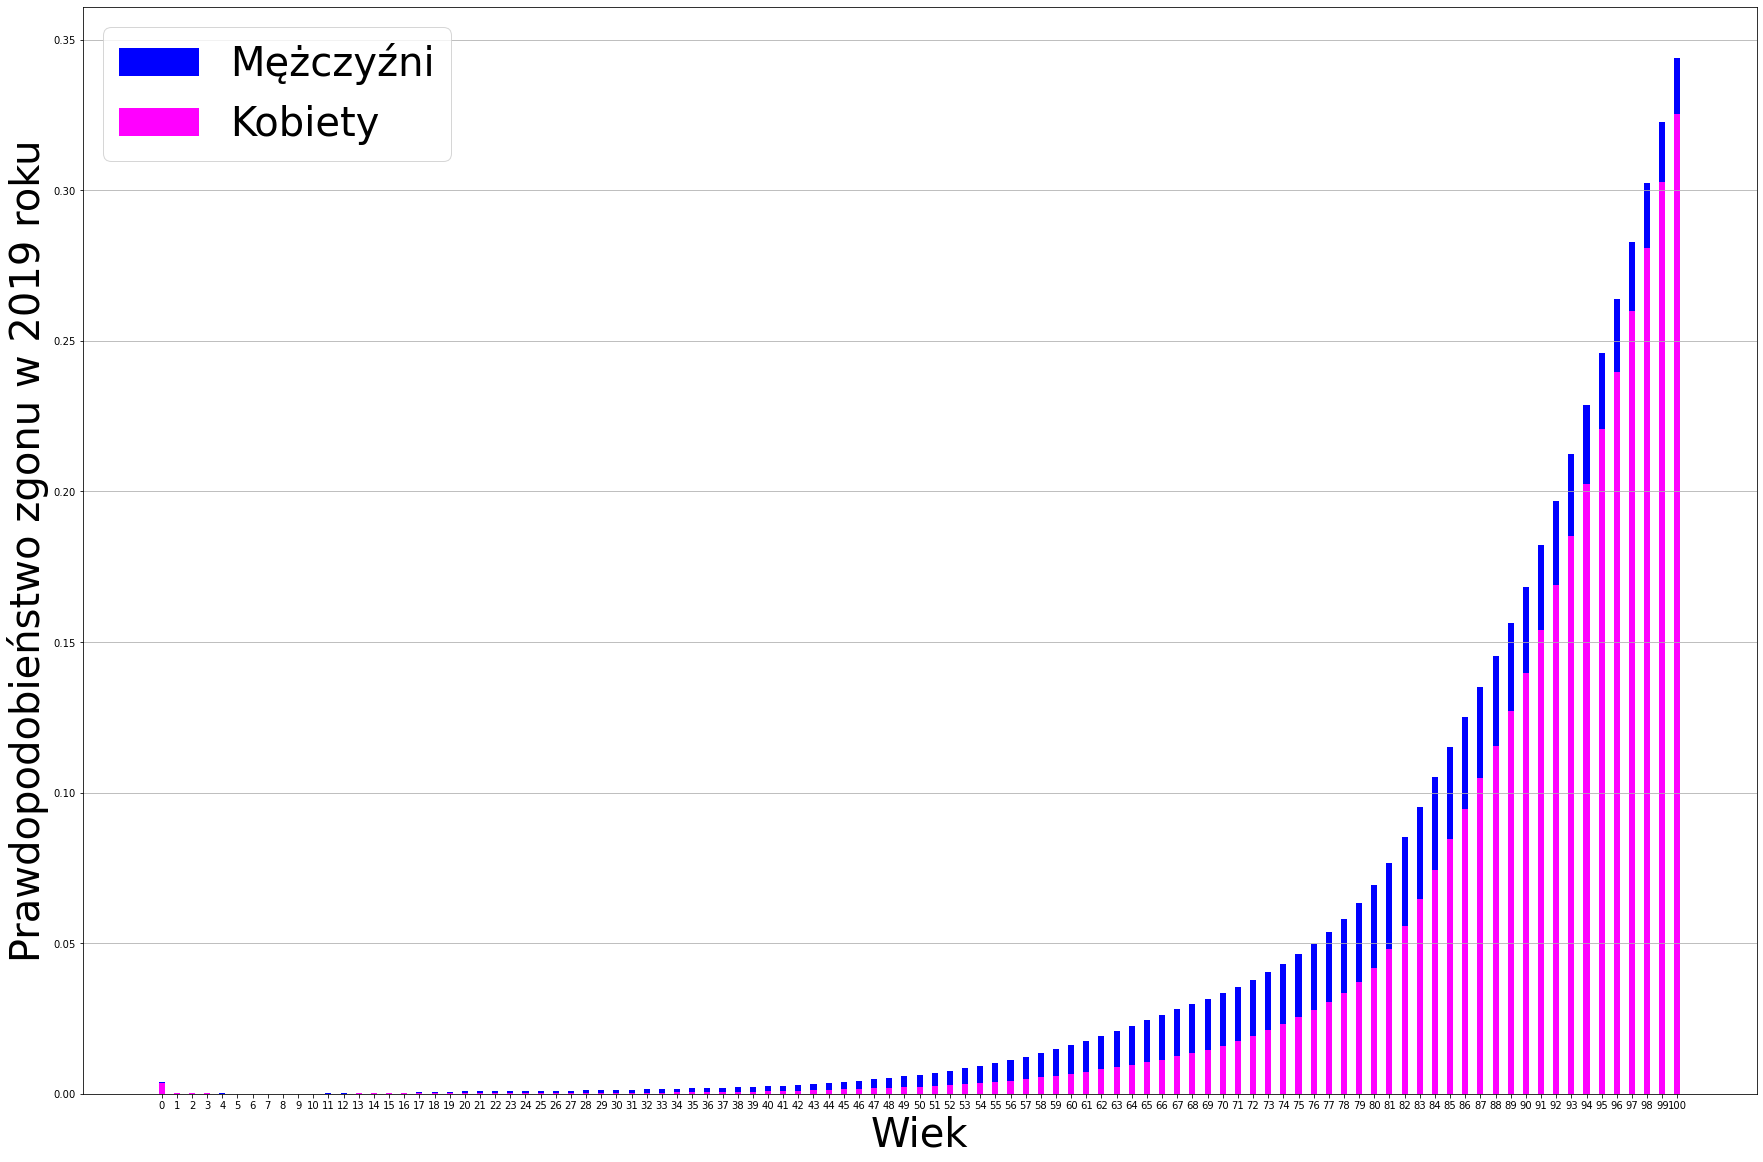

In [11]:
plt.figure(figsize=(30,20))
plt.bar(WiekMen2019, PMen2019,color=KolorMen, label="Mężczyźni",width = 0.4)
plt.bar(WiekKobiet2019, PKobiet2019,color=KolorKobiet, label="Kobiety",width = 0.4)
plt.xlabel('Wiek', fontsize=40)
plt.ylabel('Prawdopodobieństwo zgonu w 2019 roku', fontsize=40)
plt.xticks(np.arange(0,101,1))
plt.grid(axis="y")
plt.legend(loc="best",fontsize=40)
plt.show()


<p style="font: 25px Arial; font-weight:600 ">Zależność między ilością dożywających, a wiekiem</p>

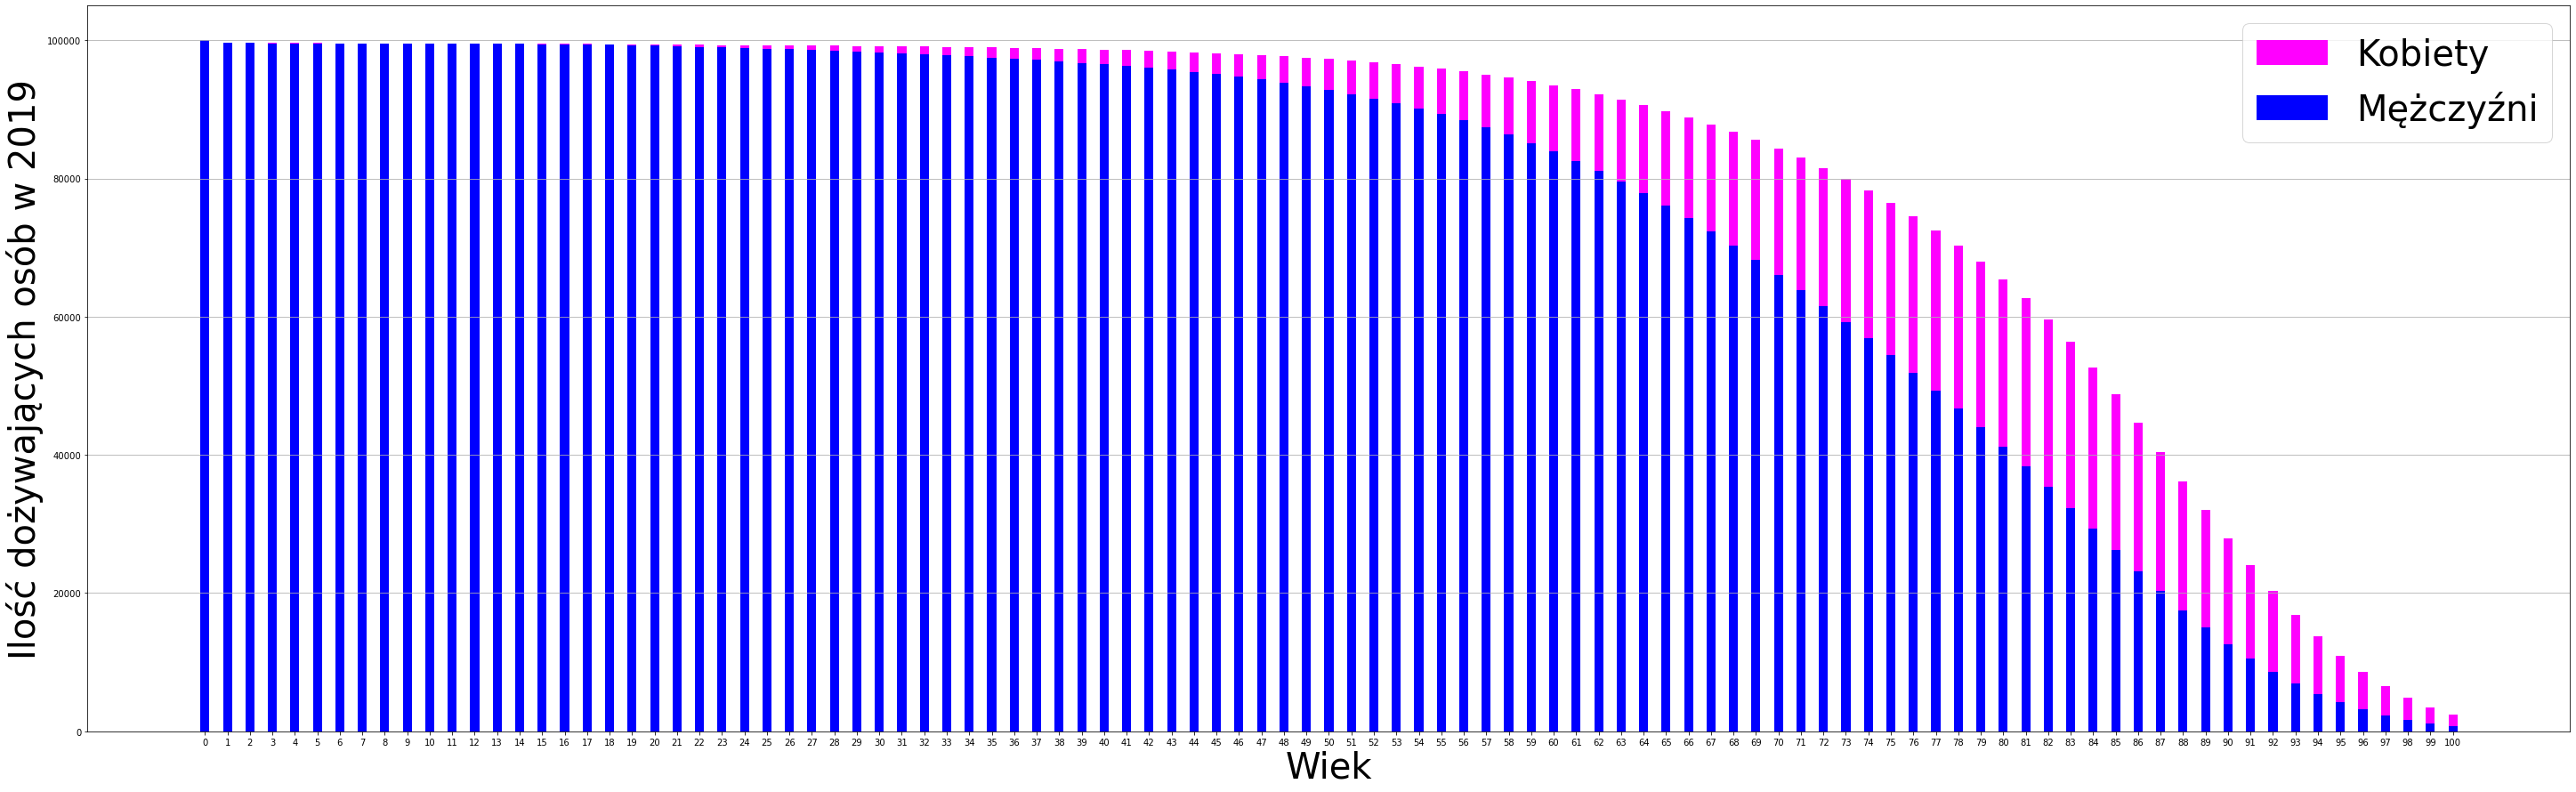

In [12]:
plt.figure(figsize=(50,15))
plt.bar(WiekKobiet2019, LiczbaKobiet2019,color=KolorKobiet, label="Kobiety",width = 0.4)
plt.bar(WiekMen2019, LiczbaMen2019,color=KolorMen, label="Mężczyźni",width = 0.4)
plt.xlabel('Wiek', fontsize=40)
plt.ylabel('Ilość dożywających osób w 2019', fontsize=40)
plt.xticks(np.arange(0,101,1))
plt.grid(axis="y")
plt.legend(loc="best",fontsize=40)
plt.show()

<p style="font: 25px Arial; font-weight:600 ">Zależność między ilością zgonów, a wiekiem</p>

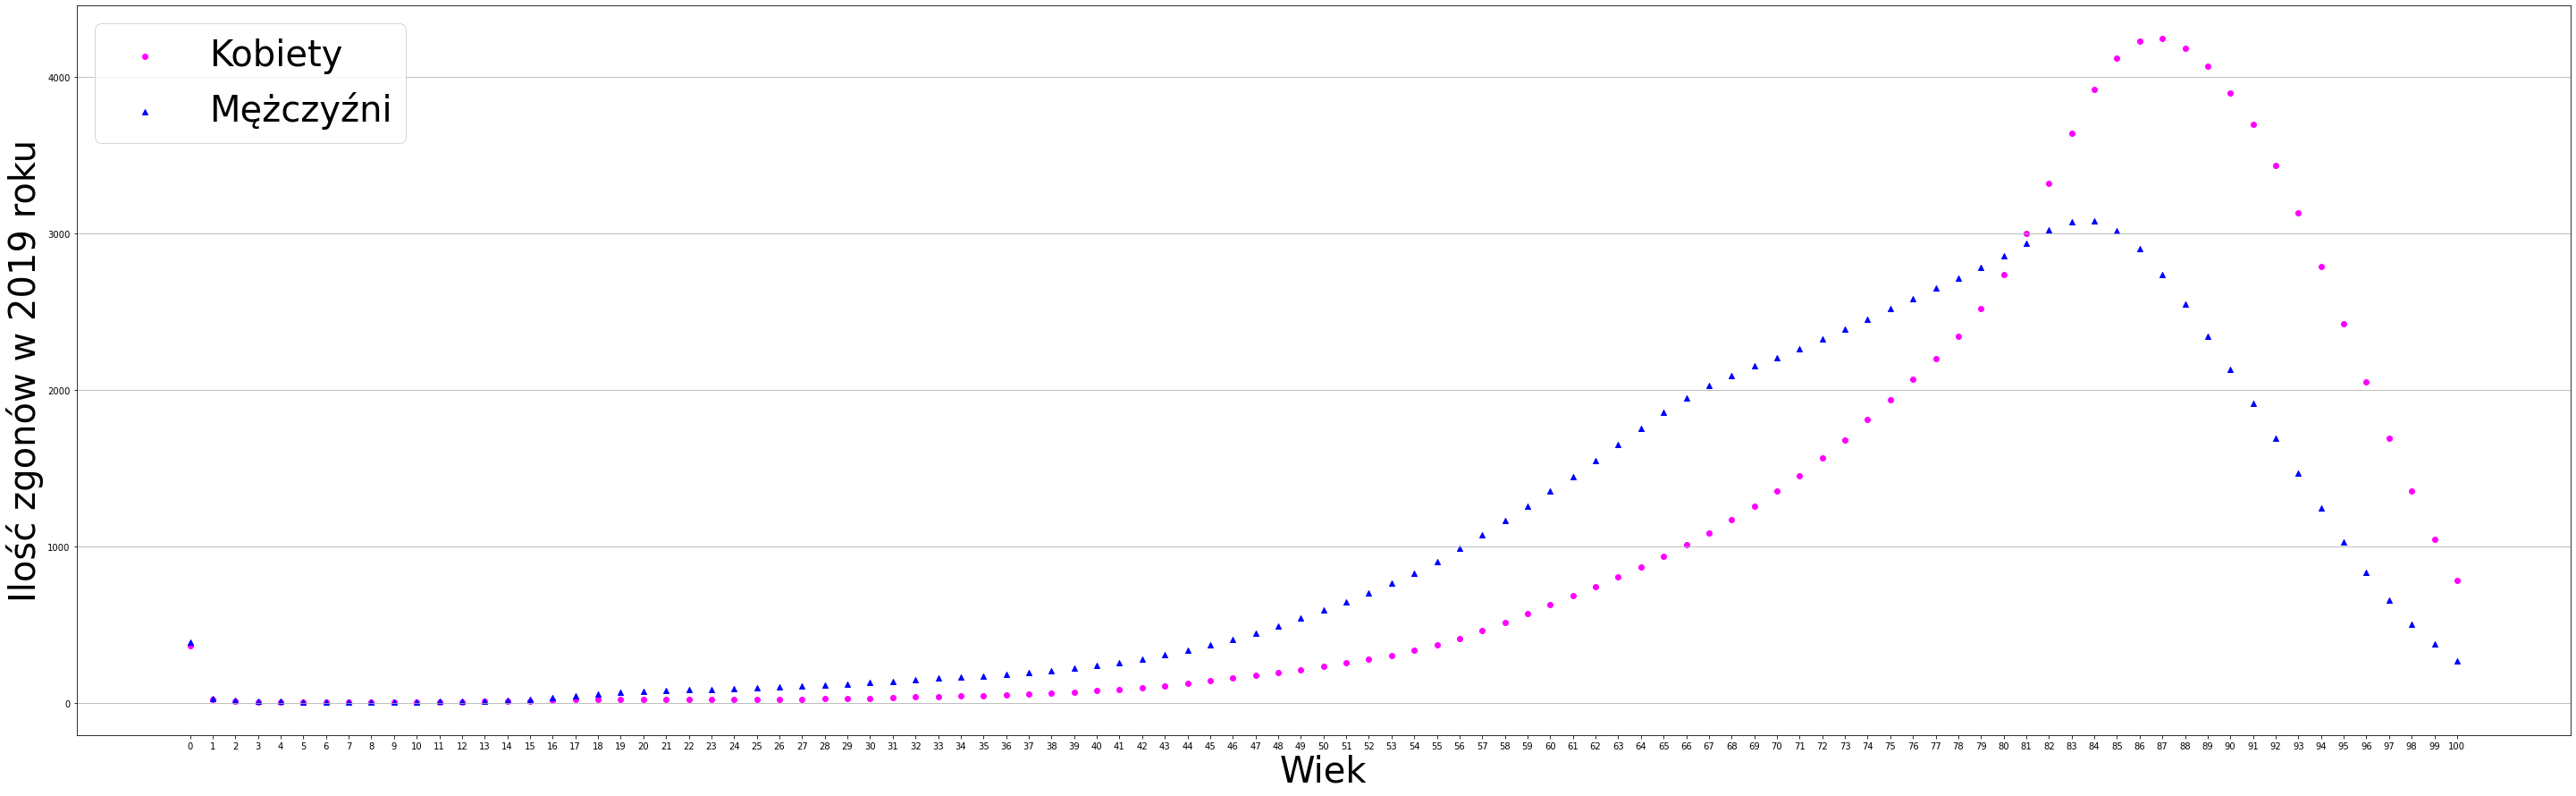

In [13]:
plt.figure(figsize=(50,15))
plt.scatter(WiekKobiet2019,ZmarliKobiet2019,color=KolorKobiet, label="Kobiety", marker="o")
plt.scatter(WiekMen2019, ZmarliMen2019,color=KolorMen, label="Mężczyźni", marker="^")


#width =0.25
#plt.bar(np.arange(len(WiekMen2019))- width/2, ZmarliMen2019, width=width, color='blue', label="Liczba zgnów wśród mężczyzn w 2019 roku")
#plt.bar(np.arange(len(WiekKobiet2019))+ width/2, ZmarliKobiet2019, width=width,color='red', label="Liczba zgonów wśród kobiet w 2019 roku" )

plt.xlabel('Wiek', fontsize=40)
plt.ylabel('Ilość zgonów w 2019 roku', fontsize=40)
plt.xticks(np.arange(0,101,1))
plt.grid(axis="y")
plt.legend(loc="best",fontsize=40)
plt.show()

<p style="font: 25px Arial; font-weight:600 "> Zależność między wiekiem, a prawdopodobieństwem zgonu</p>

In [14]:
WiekMen = Rok2019["P"][:101]
WiekKobiet = Rok2019["P"][101:]
Rok2019['new1'] = WiekMen
Rok2019['new2'] = WiekKobiet
Rok2019['new2']=Rok2019['new2'].shift(periods=-101)
Rok2019['new1'] = Rok2019['new1'].fillna(0)
Rok2019['new2'] = Rok2019['new2'].fillna(0)
Rok2019['SumaP'] = Rok2019['new1']+Rok2019['new2']
del Rok2019['new1']
del Rok2019['new2']
Rok2019['SumaP']
Rok2019

,Plec,Wiek,Liczba,P,Zmarli,Ludnosc,Skumulowana,Dalsze,SumaP
0,1.0,0.0,100000.0,0.00391,391.0,99805.0,7406611.0,74.07,0.00757
1,1.0,1.0,99609.0,0.00027,28.0,99595.0,7306807.0,73.35,0.00048
2,1.0,2.0,99581.0,0.00018,18.0,99572.0,7207212.0,72.38,0.00032
3,1.0,3.0,99563.0,0.00012,12.0,99557.0,7107640.0,71.39,0.00022
4,1.0,4.0,99551.0,0.00010,10.0,99546.0,7008083.0,70.40,0.00018
...,...,...,...,...,...,...,...,...,...
197,2.0,96.0,8554.0,0.23979,2051.0,7529.0,25704.0,3.00,0.00000
198,2.0,97.0,6503.0,0.25988,1690.0,5658.0,18176.0,2.79,0.00000
199,2.0,98.0,4813.0,0.28088,1352.0,4137.0,12518.0,2.60,0.00000
200,2.0,99.0,3461.0,0.30276,1048.0,2937.0,8381.0,2.42,0.00000


In [24]:
Rok2019SumaP=Rok2019["SumaP"][0:101]

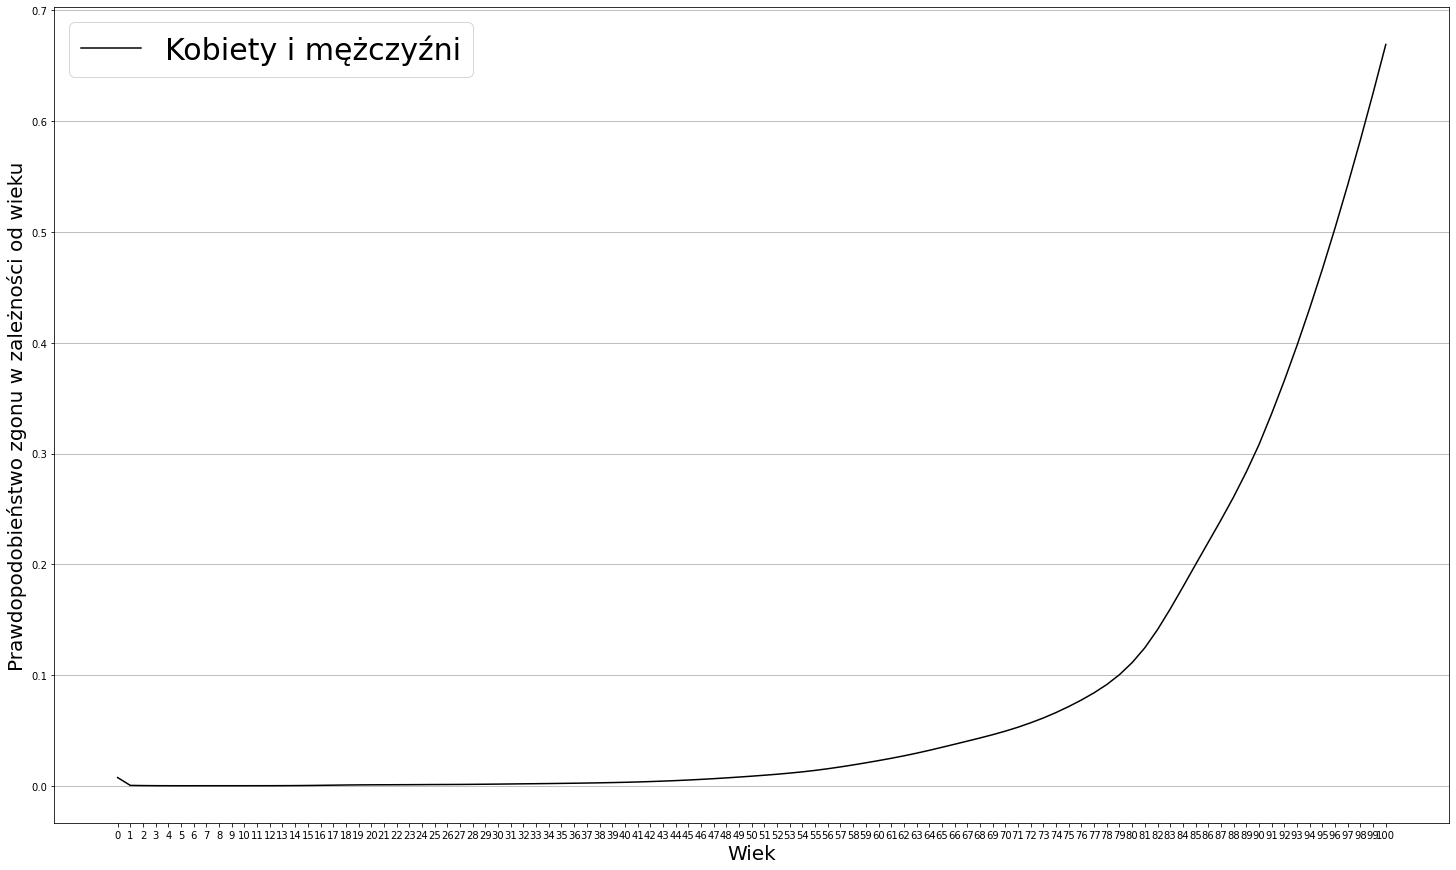

In [25]:
plt.figure(figsize=(25,15))
plt.plot(WiekKobiet2019, Rok2019SumaP,color=KolorRazem, label="Kobiety i mężczyźni")
plt.xlabel('Wiek', fontsize=20)
plt.ylabel('Prawdopodobieństwo zgonu w zależności od wieku', fontsize=20)
plt.xticks(np.arange(0,101,1))
plt.grid(axis="y")
plt.legend(loc="best",fontsize=30)
plt.show()

<p style="font: 25px Arial; font-weight:600 ">Najmniejsze prawdopodobieństwo zgonu</p>

In [17]:
print("Najmniejsze prawdopodobieństwo zgonu kobiet, w 2019 roku,  było w wieku" ,np.argmin(PKobiet2019),"lat ")
print("Najmniejsze prawdopodobieństwo zgonu mężczyzn ,w 2019 roku,  było w wieku" ,np.argmin(PMen2019),"lat ")
print("Najmniejsze prawdopodobieństwo zgonu w 2019 roku było w wieku" ,np.argmin(Rok2019SumaP),"lat ")
print("")
print("Największe prawdopodobieństwo zgonu kobiet, w 2019 roku,  było w wieku" ,np.argmax(PKobiet2019),"lat ")
print("Największe prawdopodobieństwo zgonu mężczyzn ,w 2019 roku,  było w wieku" ,np.argmax(PMen2019),"lat ")
print("Największe prawdopodobieństwo zgonu w 2019 roku było w wieku" ,np.argmax(Rok2019SumaP),"lat ")

Najmniejsze prawdopodobieństwo zgonu kobiet, w 2019 roku,  było w wieku 4 lat 
Najmniejsze prawdopodobieństwo zgonu mężczyzn ,w 2019 roku,  było w wieku 5 lat 
Najmniejsze prawdopodobieństwo zgonu w 2019 roku było w wieku 5 lat 

Największe prawdopodobieństwo zgonu kobiet, w 2019 roku,  było w wieku 100 lat 
Największe prawdopodobieństwo zgonu mężczyzn ,w 2019 roku,  było w wieku 100 lat 
Największe prawdopodobieństwo zgonu w 2019 roku było w wieku 100 lat 


 <p style="background-color: pink; font: 30px Arial; font-weight:600 ; text-decoration:underline">Analiza danych na przestrzeni lat </p>

<p style=" font: 25px Arial; font-weight:600 ">Wczytanie wszystkich skoroszytów z arkusza danych</p>

In [18]:
i=0
r=list()
R=list()
Rok = list()
rok=["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
for i in range (0,30,1):
    r.append( pd.read_excel('tablice_trwania_zycia_1990-2019.xls', sheet_name=rok[i],names=['Plec', 'Wiek', 'Liczba','P','Zmarli','Ludnosc','Skumulowana','Dalsze']))
    R.append(r[i].drop([0,1,2], axis=0))
    _dane = []
    for j in R[i].values:
        temp = []
        for k in j:
            temp.append(k)
        _dane.append(temp)
    Rok.append(pd.DataFrame(_dane, dtype="float64", columns=R[i].columns))

<p style="font: 25px Arial; font-weight:600 ">Zależność prawdopodobieństwa zgonu od roku dla osób w wieku 21 lat</p>

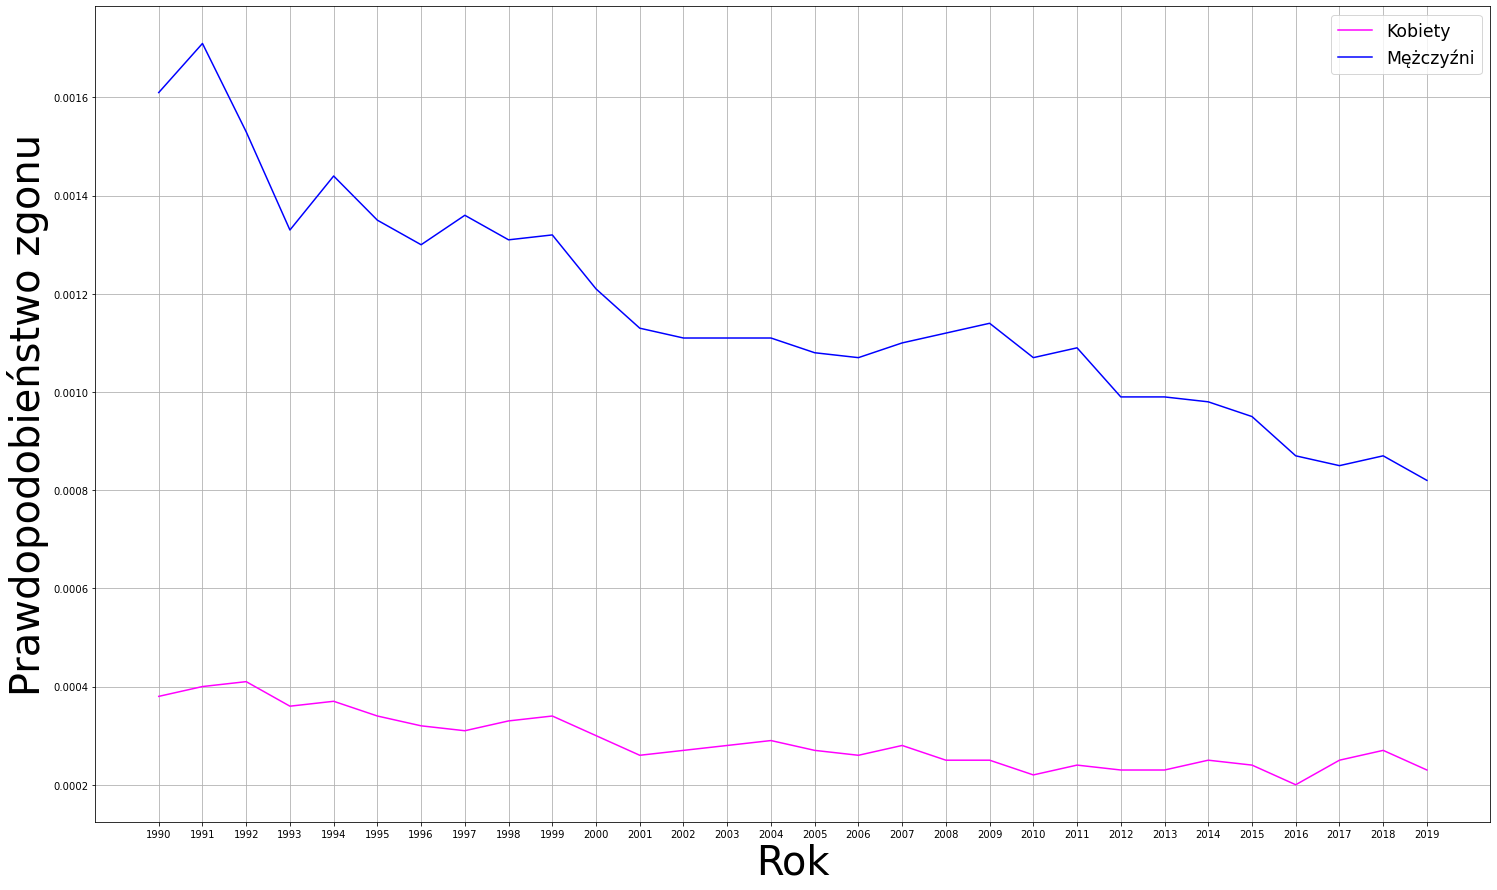

In [19]:
i=0
LataPMen=list()
LataPKobiet=list()
Lata=list()
for i in range(0,30,1):
    LataPMen.append(Rok[i]["P"][21])
    LataPKobiet.append(Rok[i]["P"][21+101])
    Lata.append(rok[i])
    
    
plt.figure(figsize=(25,15))
plt.plot(Lata, LataPKobiet,color=KolorKobiet, label="Kobiety")
plt.plot(Lata, LataPMen,color=KolorMen, label="Mężczyźni")
plt.xlabel('Rok', fontsize=40)
plt.ylabel('Prawdopodobieństwo zgonu', fontsize=40)
plt.xticks(np.arange(0,30,1))
plt.grid()
plt.legend(loc="best",fontsize="xx-large")
plt.show()

<p style="font: 25px Arial; font-weight:600 ">Ilość zgonów osób w wieku 21 lat na przestrzeni lat</p>

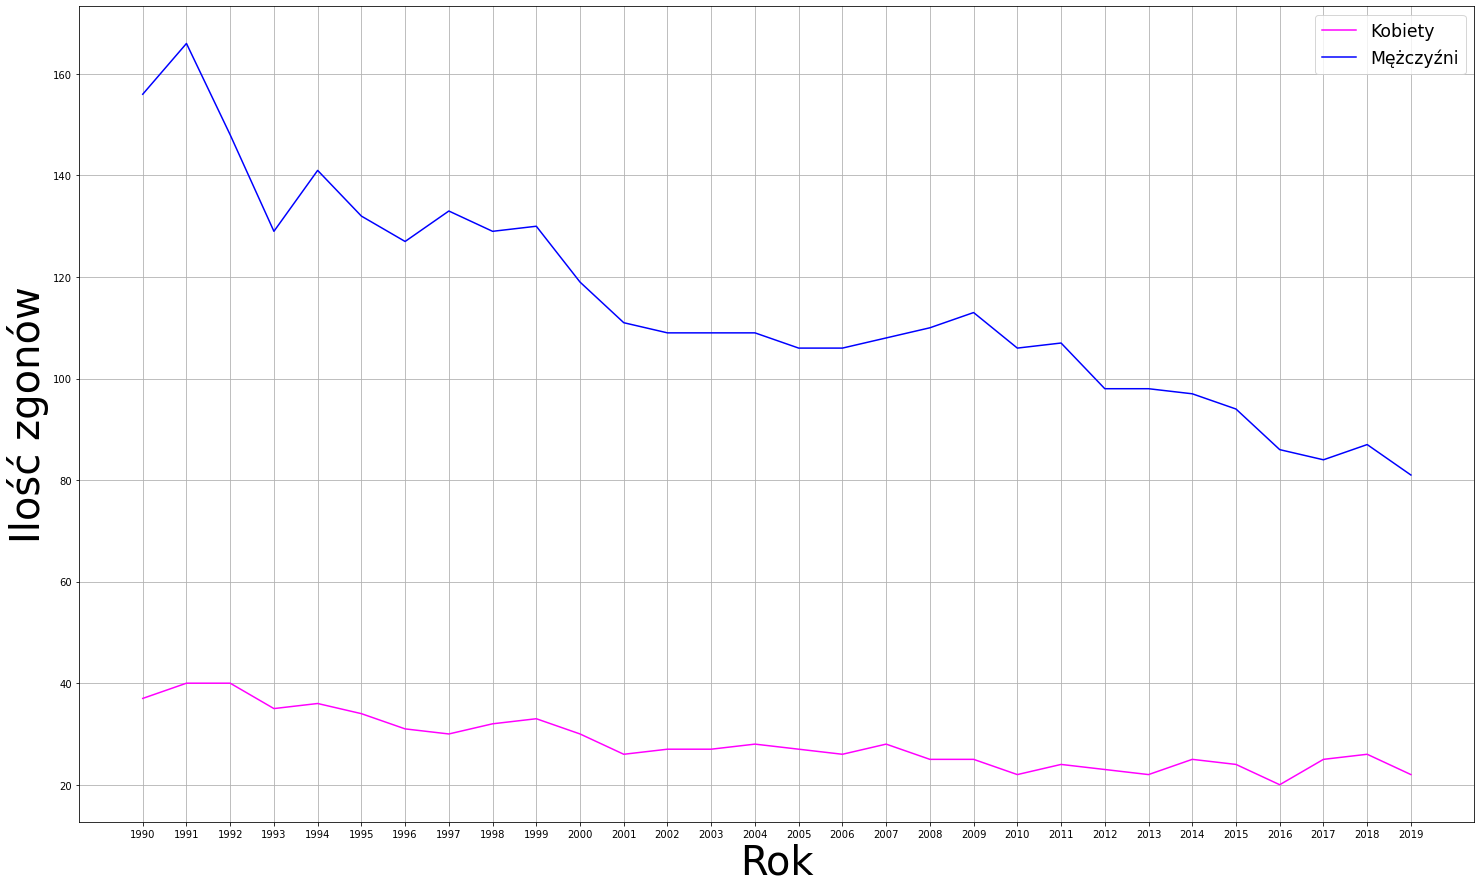

In [26]:
i=0
LataZmarliMen=list()
LataZmarliKobiet=list()
Lata=list()
for i in range(0,30,1):
    LataZmarliMen.append(Rok[i]["Zmarli"][21])
    LataZmarliKobiet.append(Rok[i]["Zmarli"][21+101])
    Lata.append(rok[i])
    
    
plt.figure(figsize=(25,15))
plt.plot(Lata, LataZmarliKobiet,color=KolorKobiet, label="Kobiety")
plt.plot(Lata, LataZmarliMen,color=KolorMen, label="Mężczyźni")
plt.xlabel('Rok', fontsize=40)
plt.ylabel('Ilość zgonów', fontsize=40)
plt.xticks(np.arange(0,30,1))
plt.grid()
plt.legend(loc="best",fontsize="xx-large")
plt.show()

In [21]:
min(LataZmarliMen)

81.0

<p style="font: 25px Arial; font-weight:600 ">Zależność przewidywanej długości życia ludzi w wieku 21 lat na przestrzeni lat</p>

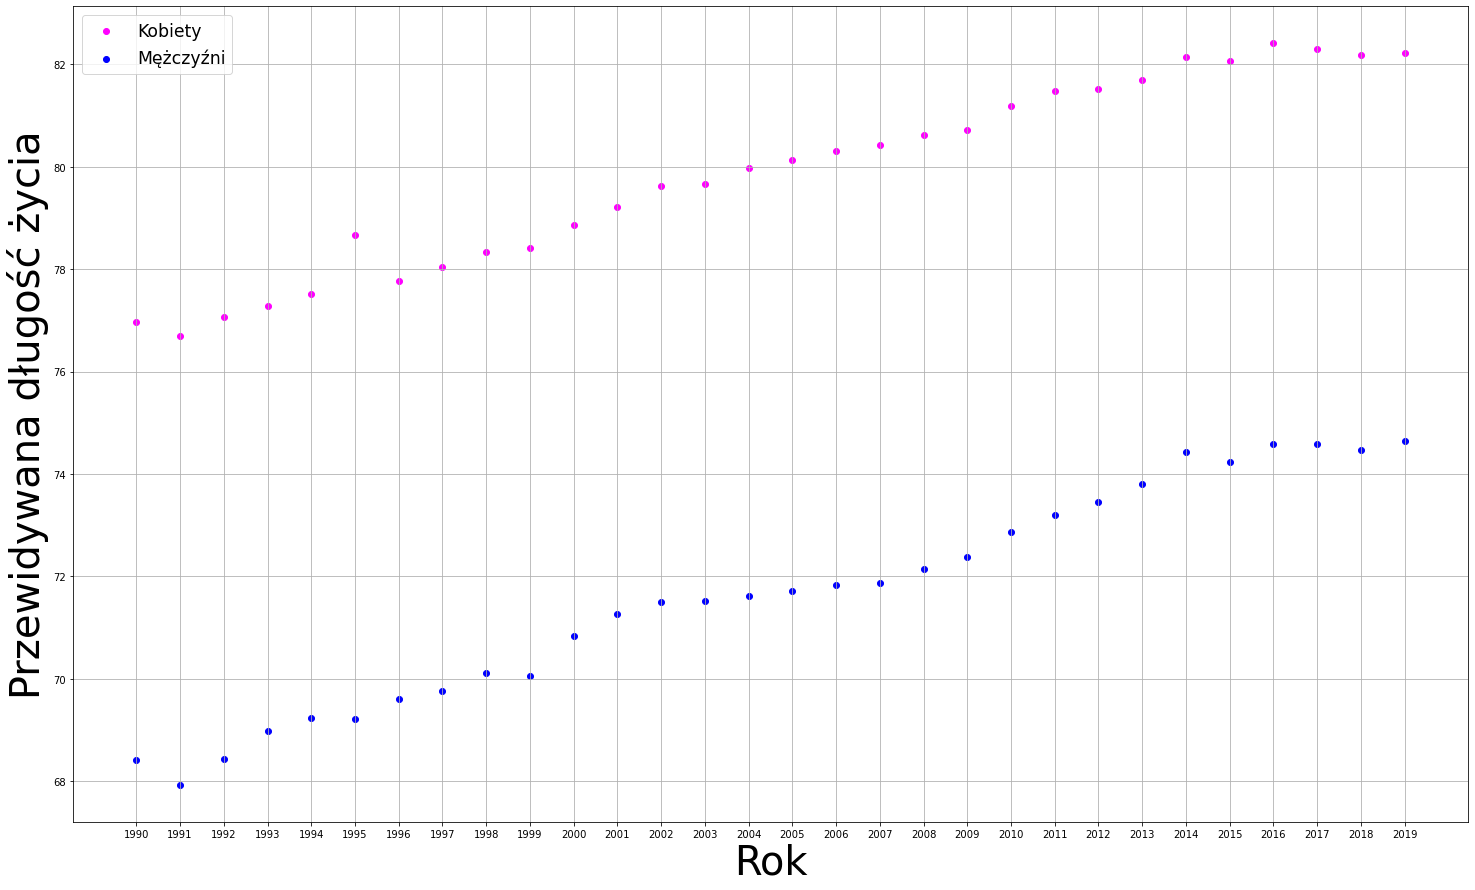

In [22]:
i=0
LataDalszeMen=list()
LataDalszeKobiet=list()
Lata=list()
for i in range(0,30,1):
    LataDalszeMen.append(21+Rok[i]["Dalsze"][21])
    LataDalszeKobiet.append(21+Rok[i]["Dalsze"][21+101])
    Lata.append(rok[i])
    
    
plt.figure(figsize=(25,15))
plt.scatter(Lata, LataDalszeKobiet, color=KolorKobiet, label="Kobiety")
plt.scatter(Lata, LataDalszeMen, color=KolorMen, label="Mężczyźni")
plt.xlabel('Rok', fontsize=40)
plt.ylabel('Przewidywana długość życia', fontsize=40)
plt.xticks(np.arange(0,30,1))
plt.grid()
plt.legend(loc="best",fontsize="xx-large")
plt.show()

<p style="font: 25px Arial; font-weight:600 "> Różnica w przewidywanej długości życia dla kobiet i mężczyzn na przestrzeni lat</p>

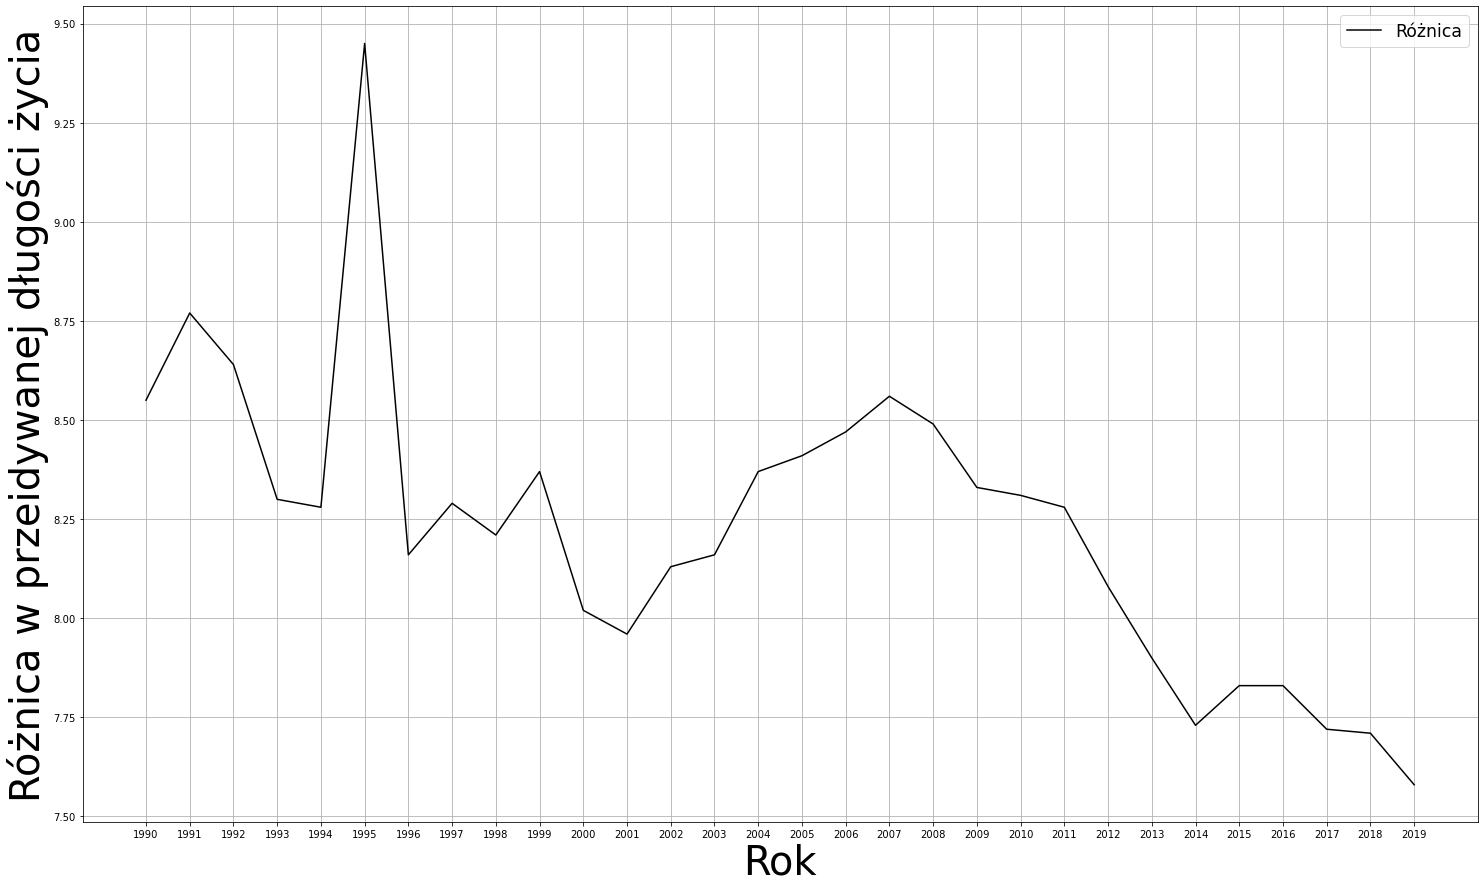

In [23]:
i=0
LataDalszeMen=list()
LataDalszeKobiet=list()
LataDalsze=list()
Lata=list()
for i in range(0,30,1):
    LataDalszeMen.append(Rok[i]["Dalsze"][21])
    LataDalszeKobiet.append(Rok[i]["Dalsze"][21+101])
    LataDalsze.append(Rok[i]["Dalsze"][21+101]-Rok[i]["Dalsze"][21])
    Lata.append(rok[i])
        
plt.figure(figsize=(25,15))
plt.plot(Lata, LataDalsze, color=KolorRazem, label="Różnica")
plt.xlabel('Rok', fontsize=40)
plt.ylabel('Różnica w przeidywanej długości życia', fontsize=40)
plt.xticks(np.arange(0,30,1))
plt.grid()
plt.legend(loc="best",fontsize="xx-large")
plt.show()

<p style=" text-align: center; font: 25px Arial; font-weight:600 ">Dziękujemy za uwagę !</p>